12 steps to Navier-Stokes
=====
***

This will be a milestone! We now get to Step 8: Burgers' equation. We can learn so much more from this equation. It plays a very important role in fluid mechanics, because it contains the full convective nonlinearity of the flow equations, and at the same time there are many known analytical solutions.


Step 8: Burgers' Equation in 2D
----
***

Remember, Burgers' equation can generate discontinuous solutions from an initial condition that is smooth, i.e., can develop "shocks." We want to see this in two dimensions now!

Here is our coupled set of PDEs:

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = \nu \; \left(\frac{\partial ^2 u}{\partial x^2} + \frac{\partial ^2 u}{\partial y^2}\right)$$

$$
\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = \nu \; \left(\frac{\partial ^2 v}{\partial x^2} + \frac{\partial ^2 v}{\partial y^2}\right)$$

We know how to discretize each term: we've already done it before!

$$
\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n - u_{i,j-1}^n}{\Delta y} = $$
$$\qquad \nu \bigg( \frac{u_{i+1,j}^n - 2u_{i,j}^n+u_{i-1,j}^n}{\Delta x^2} + \frac{u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2} \bigg)$$



$$
\frac{v_{i,j}^{n+1} - v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n - v_{i,j-1}^n}{\Delta y} = $$
$$\nu \bigg( \frac{v_{i+1,j}^n - 2v_{i,j}^n+v_{i-1,j}^n}{\Delta x^2} + \frac{v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n}{\Delta y^2} \bigg)$$

And now, we will rearrange each of these equations for the only unknown: the two components $u,v$ of the solution at the next time step:

$$u_{i,j}^{n+1} = u_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (u_{i,j}^n - u_{i-1,j}^n) - \frac{\Delta t}{\Delta y} v_{i,j}^n (u_{i,j}^n - u_{i,j-1}^n)+ $$
$$ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n-2u_{i,j}^n+u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j+1}^n)$$ 

$$v_{i,j}^{n+1} =  v_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (v_{i,j}^n - v_{i-1,j}^n) - \frac{\Delta t}{\Delta y} v_{i,j}^n (v_{i,j}^n - v_{i,j-1}^n)+ $$
$$ \frac{\nu \Delta t}{\Delta x^2}(v_{i+1,j}^n-2v_{i,j}^n+v_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j+1}^n)$$ 

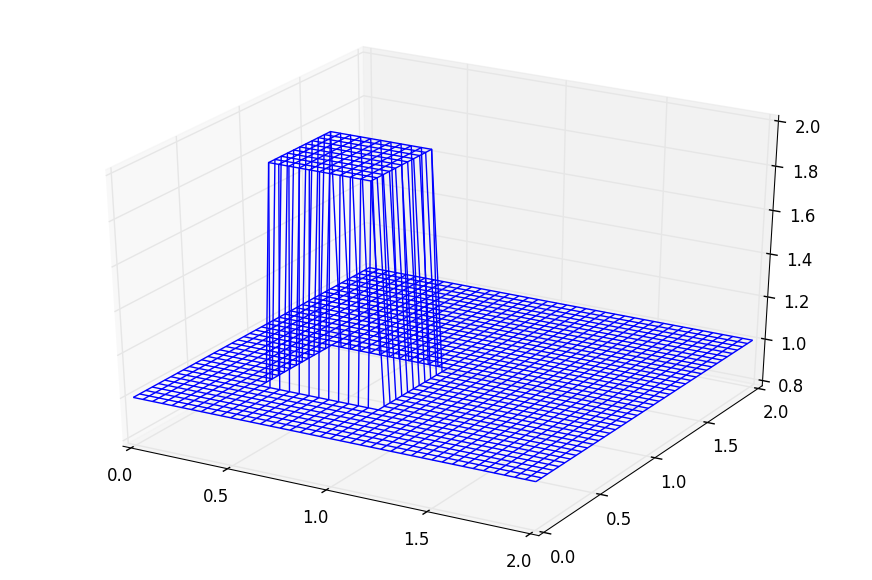

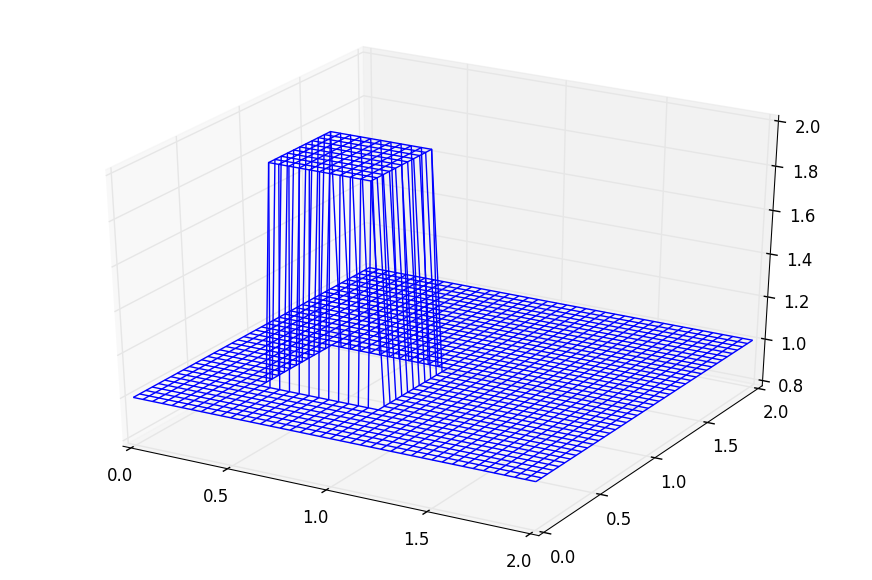

PyObject <mpl_toolkits.mplot3d.art3d.Line3DCollection object at 0x7f09b69d5860>

In [60]:
using PyPlot
plt=PyPlot

###variable declarations
nx = 41;
ny = 41;
nt = 120;
c = 1;
dx = 2/(nx-1);
dy = 2/(ny-1);
sigma = .0009;
nu = 0.01;
dt = sigma*dx*dy/nu;


x = linspace(0,2,nx);
y = linspace(0,2,ny);

u = ones((ny,nx)); ##create a 1xn vector of 1's
v = ones((ny,nx));
un = ones((ny,nx)); ##
vn = ones((ny,nx));
comb = ones((ny,nx))

###Assign initial conditions

u[Int(.5/dy):Int(1/dy),Int(.5/dx):Int(1/dx)]=2 ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
v[Int(.5/dy):Int(1/dy),Int(.5/dx):Int(1/dx)]=2 ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2

###(plot ICs)
fig0= plt.figure(figsize=(11,7), dpi=100)
wire1 = plt.plot_wireframe(x,y,u, cmap=ColorMap("coolwarm"))
fig1 = plt.figure(figsize=(11,7), dpi=100)

wire2 = plt.plot_wireframe(x,y,v, cmap=ColorMap("coolwarm"))

In [61]:
for n in 1:nt ##loop across number of time steps
    un = copy(u)
    vn = copy(v)

    u[2:end-1,2:end-1] = un[2:end-1,2:end-1] - dt/dx*un[2:end-1,2:end-1].*(un[2:end-1,2:end-1]-un[2:end-1,1:end-2])-
    dt/dy*vn[2:end-1,2:end-1].*(un[2:end-1,2:end-1]-un[1:end-2,2:end-1])+nu*dt/dx^2*(un[2:end-1,3:end]-2*
    un[2:end-1,2:end-1]+un[2:end-1,1:end-2])+nu*dt/dy^2*(un[3:end,2:end-1]-2*un[2:end-1,2:end-1]+un[3:end,2:end-1])
    
    v[2:end-1,2:end-1] = vn[2:end-1,2:end-1] - dt/dx*un[2:end-1,2:end-1].*(vn[2:end-1,2:end-1]-vn[2:end-1,1:end-2])-
    dt/dy*vn[2:end-1,2:end-1].*(vn[2:end-1,2:end-1]-vn[1:end-2,2:end-1])+nu*dt/dx^2*(vn[2:end-1,3:end]-2*vn[2:end-1,2:end-1]+vn[2:end-1,1:end-2])+
    nu*dt/dy^2*(vn[3:end,2:end-1]-2*vn[2:end-1,2:end-1]+vn[3:end,2:end-1])
     
    u[1,:] = 1
    u[end,:] = 1
    u[:,1] = 1
    u[:,end] = 1
    
    v[1,:] = 1
    v[end,:] = 1
    v[:,1] = 1
    v[:,end] = 1
end

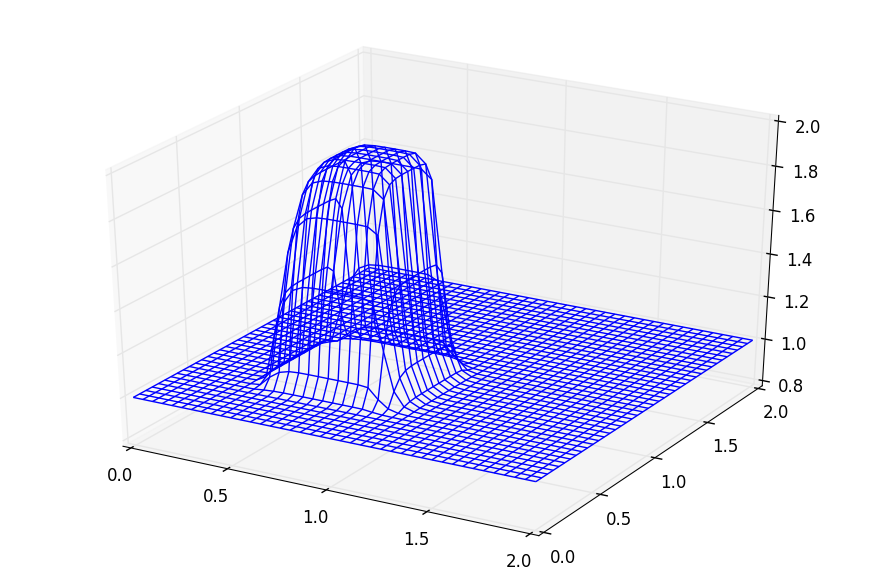

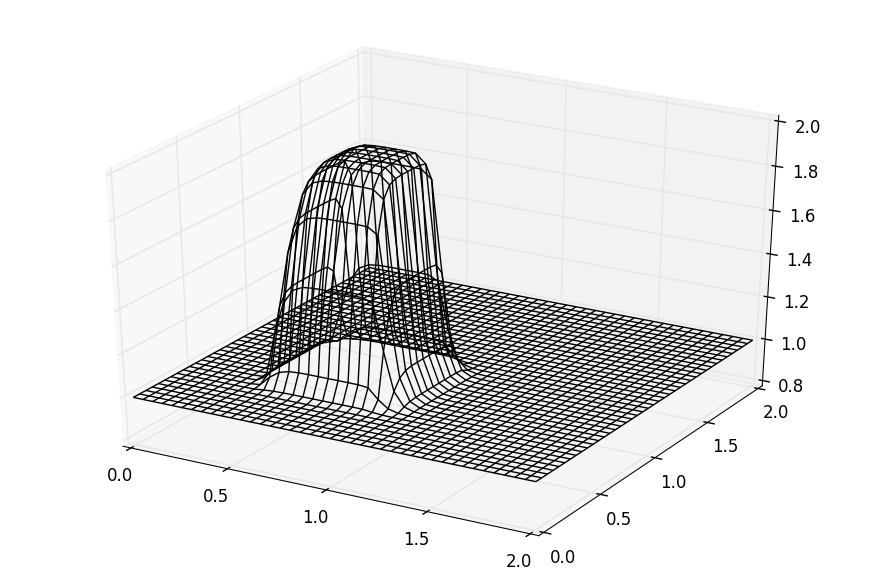

PyObject <mpl_toolkits.mplot3d.art3d.Line3DCollection object at 0x7f09b6918780>

In [62]:
fig = plt.figure(figsize=(11,7), dpi=100)
wire1 = plt.plot_wireframe(x,y,u,color="b")
fig2=plt.figure(figsize=(11,7),dpi=100)
wire2 = plt.plot_wireframe(x,y,v,color="k")